<a href="https://colab.research.google.com/github/AadityaSinha11/Topological_Insulators/blob/main/SSH_Model_numerical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.sparse import lil_matrix

def SSH_Hamiltonian(L, t1, t2):
    """
    Generate the Hamiltonian matrix for the SSH model.

    Parameters:
    - L: Number of unit cells
    - t1: Intracell hopping parameter
    - t2: Intercell hopping parameter

    Returns:
    - Hamiltonian matrix
    """
    N = 2 * L  # Number of lattice sites

    H = lil_matrix((N, N), dtype=complex)

    for i in range(N - 1):
        if i % 2 == 0:
            H[i, i + 1] = t1  # Intracell hopping
        else:
            H[i, i + 1] = t2  # Intercell hopping

    # Make the Hamiltonian hermitian by copying and conjugate-transposing the lower triangle
    H = H + H.conjugate().transpose()

    return H

In [ ]:
# Example usage
L = 100  # Number of unit cells
t1 = 1.0  # Intracell hopping parameter
t2 = 0.5  # Intercell hopping parameter

hamiltonian = SSH_Hamiltonian(L, t1, t2)
hamiltonian_matrix = hamiltonian.toarray()  # Convert the sparse matrix to a dense matrix for display
print(hamiltonian_matrix)

[[0. +0.j 1. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [1. +0.j 0. +0.j 0.5+0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 ...
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0.5+0.j 0. +0.j 1. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 1. +0.j 0. +0.j]]


In [ ]:
import numpy as np
from scipy.fftpack import fftn, ifftn

# Step 2: Create a reciprocal space grid
# Define the dimensions of your grid
grid_size_x = hamiltonian.shape[0]
#grid_size_y = hamiltonian_matrix.shape[1]

# Create a grid of k-values (reciprocal space)
kx_values = np.fft.fftfreq(grid_size_x, d=1.0)

#ky_values = np.fft.fftfreq(grid_size_y)

# Generate a 2D grid of k-values
kx = np.meshgrid(kx_values)

# Step 3: Perform the Fourier transform
# Use the fftn function from SciPy to perform the 2D Fourier transform
fourier_transformed_matrix = fftn(hamiltonian_matrix)


# Print the result
print("Original Hamiltonian Matrix:")
print(hamiltonian_matrix)

print("Fourier-Transformed Matrix:")
print(fourier_transformed_matrix)

Original Hamiltonian Matrix:
[[0. +0.j 1. +0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [1. +0.j 0. +0.j 0.5+0.j ... 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0.5+0.j 0. +0.j ... 0. +0.j 0. +0.j 0. +0.j]
 ...
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 0.5+0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0.5+0.j 0. +0.j 1. +0.j]
 [0. +0.j 0. +0.j 0. +0.j ... 0. +0.j 1. +0.j 0. +0.j]]
Fourier-Transformed Matrix:
[[299.        +0.00000000e+00j  -0.99975328-1.57053795e-02j
   -0.99901336-3.13952598e-02j ...  -0.99778098+4.70541567e-02j
   -0.99901336+3.13952598e-02j  -0.99975328+1.57053795e-02j]
 [ -0.99975328-1.57053795e-02j  -0.99950656-3.14107591e-02j
   -0.99876664-4.71006393e-02j ...  -0.99753426+3.13487771e-02j
   -0.99876664+1.56898802e-02j 298.85246155-1.80411242e-15j]
 [ -0.99901336-3.13952598e-02j  -0.99876664-4.71006393e-02j
   -0.99802673-6.27905195e-02j ...  -0.99679435+1.56588969e-02j
  298.4099918 +3.60822483e-15j  -0.99876664-1.56898802e-02j]
 ...
 [ -0.99778098+4.70541567e-02j  -0.99753426+3.1

In [ ]:
from scipy.linalg import eig

# Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = eig(hamiltonian_matrix)

print("Eigenvalues:")
for i, eigval in enumerate(eigenvalues):
        print(f"n = {i+1}: {eigval}")

print("Eigenvectors:")
print(eigenvectors)

Eigenvalues:
n = 1: (1.4998376825298463+0j)
n = 2: (1.4993507832844293+0j)
n = 3: (1.4985394617763357+0j)
n = 4: (1.4974039839183866+0j)
n = 5: (1.4959447221117825+0j)
n = 6: (1.494162155370477+0j)
n = 7: (1.4920568694825382+0j)
n = 8: (1.4838121609002297+0j)
n = 9: (1.4804239996162718+0j)
n = 10: (1.48688101852628+0j)
n = 11: (1.476717658145568+0j)
n = 12: (-1.499837682529846+0j)
n = 13: (-1.4993507832844302+0j)
n = 14: (-1.4985394617763408+0j)
n = 15: (-1.4974039839183881+0j)
n = 16: (-1.4959447221117839+0j)
n = 17: (-1.4941621553704725+0j)
n = 18: (-1.4920568694825282+0j)
n = 19: (-1.4804239996162762+0j)
n = 20: (-1.4838121609002293+0j)
n = 21: (-1.4868810185262786+0j)
n = 22: (-1.4767176581455668+0j)
n = 23: (-1.4726943685630858+0j)
n = 24: (1.4726943685630949+0j)
n = 25: (-0.5004740643606991+0j)
n = 26: (-0.5018932273788157+0j)
n = 27: (-0.5042484804195474+0j)
n = 28: (0.5004740643607041+0j)
n = 29: (0.5018932273788189+0j)
n = 30: (0.5042484804195473+0j)
n = 31: (-1.46835547201645

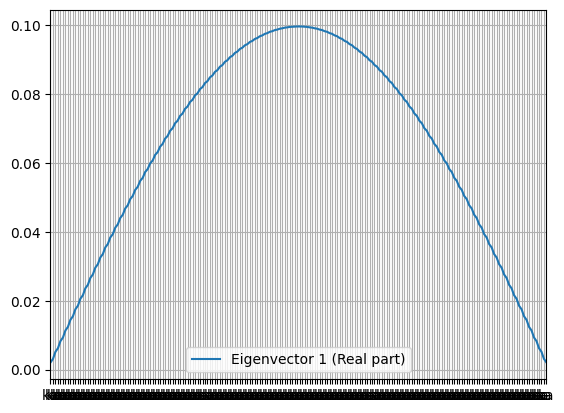

In [ ]:
import matplotlib.pyplot as pl
a=1
e1=0
k1=np.linspace(-np.pi, np.pi,200)
ex1 =  - np.sqrt((t1)**2 + (t2)**2 + 2.*(t1)*(t2)*np.cos(k1*a))
ex2 =  np.sqrt((t1)**2 + (t2)**2 + 2.*(t1)*(t2)*np.cos(k1*a))
k1=np.linspace(-np.pi, np.pi,200)
fig, axs = pl.subplots()
xticks = np.linspace(-np.pi/a, np.pi/a,200)
axs.xlabels = ['ka' for k in xticks]
axs.set_xticks(xticks)
axs.set_xlim(-np.pi,np.pi)
axs.set_xticks(xticks)
axs.set_xticklabels(xlabels)
axs.grid(True)
axs.plot(k1, eigenvectors[:, 0].real, label='Eigenvector 1 (Real part)')

axs.legend()